In [1]:
import pandas as pd 
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'size':16})
import matplotlib.cm as cmap
from multiprocessing import Pool
# from profilestats import profile
from os import listdir, path
from time import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from funcs.preprocessing.dtdm import dtdm_raw_analysis

In [2]:
wdir = '/disk1/hrb/python/'

# Splitting by property

In [27]:
dtdm_qsos_lbol = dtdm_raw_analysis('qsos', 'uid', 'r', 'qsos')
# dtdm_qsos_lbol.calculate_stats_looped_key(26, 'log', 'Lbol', save=True)
dtdm_qsos_lbol.read_pooled_stats('log', key='Lbol')
# dtdm_qsos_lbol.pooled_stats.keys()

In [28]:
########try linear mjd spacing next

In [29]:
dtdm_qsos_civ.pooled

NameError: name 'dtdm_qsos_civ' is not defined

In [ ]:
dtdm_qsos_civ = dtdm_raw_analysis('qsos', 'uid', 'r', 'qsos')
# dtdm_qsos_civ.calculate_stats_looped_key(26, 'log2', 'MBH_CIV', save=True)
dtdm_qsos_civ.read_pooled_stats('log', key='MBH_CIV')
# dtdm_qsos_lbol.pooled_stats.keys()

In [ ]:
# To find max dt
# dtdm_qsos_civ.read_key('MBH_CIV')
# uids = pd.concat(dtdm_qsos_civ.groups).index

# dts = []
# for i in range(26):
#     dtdm_qsos_civ.read(i)
#     dt = dtdm_qsos_civ.df[dtdm_qsos_civ.df.index.isin(uids)]['dt'].max()
#     dts.append(dt)

In [ ]:
dtdm_qsos_nedd = dtdm_raw_analysis('qsos', 'uid', 'r', 'qsos')
# dtdm_qsos_nedd.calculate_stats_looped_key(26, 'log', 'nEdd', save=True)
dtdm_qsos_nedd.read_pooled_stats('log', key='nEdd')
# dtdm_qsos_lbol.pooled_stats.keys()

In [ ]:
# fig, ax = dtdm_qsos_nedd.plot_stats_property(['SF cwf a'], figax=None, xscale='log', yscale='linear', ylim=(0, 0.45), ylabel='Structure Function$^2$')
# fig.savefig('plots/qso_nedd_lin.pdf', bbox_inches='tight')

In [ ]:
dtdm_qsos_civ.pooled_stats.keys()

In [ ]:
fig, ax = dtdm_qsos_civ.plot_stats_property(['SF cwf a'], figax=None, xscale='log', yscale='log', xlim=(0,10000), ylim=(1e-2, 1e0 ), ylabel='Structure Function$^2$')
# fig.savefig('plots/qso_mbh_log.pdf', bbox_inches='tight')

In [ ]:
fig, ax = dtdm_qsos_lbol.plot_stats_property(['SF cwf a'], figax=None, xscale='log', yscale='linear', ylim=(0, 0.3), ylabel='Structure Function$^2$')
fig.savefig('plots/qso_lbol_lin.pdf', bbox_inches='tight')

# Skewness

In [ ]:
fig, ax = dtdm_qsos_civ.plot_stats_property(['skewness'], figax=None, xscale='log', yscale='linear', xlim=(0,10000), ylim=(-1, 1 ), ylabel='Skewness')

In [ ]:
fig, ax = dtdm_qsos_civ.plot_stats_property(['kurtosis'], figax=None, xscale='log', yscale='linear', xlim=(0,10000), ylim=(-2,20), ylabel='Skewness')



### Drift

In [ ]:
dtdm_qsos_civ = dtdm_raw_analysis('qsos', 'uid', 'r', 'qsos')
dtdm_qsos_civ.read_pooled_stats('log_inner', key=None)

dtdm_star = dtdm_raw_analysis('calibStars', 'uid_s', 'r', 'stars')
dtdm_star.read_pooled_stats('log_inner')

print(dtdm_star.pooled_stats.keys())
print(dtdm_qsos_civ.pooled_stats.keys())


In [ ]:
fig, ax = dtdm_qsos_civ.plot_stats(['mean weighted a'], figax=None, xscale='log', yscale='linear', xlim=(0,10000), ylim=(-0.01, 0.18), ylabel='Drift (magnitude)')
dtdm_star.plot_stats(['mean weighted a'], figax=(fig,ax), color='r')
# fig.savefig('plots/qso_mbh_log.pdf', bbox_inches='tight')

# Entire population

In [ ]:
names = ['n', 'mean weighted a', 'mean weighted b', 'SF cwf a', 'SF cwf b', 'SF cwf c']

## Stars

In [43]:
# Initialise 
dtdm_star = dtdm_raw_analysis('calibStars', 'uid_s', 'r', 'stars')

In [ ]:
dts = []
for i in range(50):
    dtdm_star.read(i)
    dt = (dtdm_star.df['dt'][np.sqrt(dtdm_star.df['cat'])%1==0]).max()
    dts.append(dt)
max(dts)

In [ ]:
# Compute
# dtdm_star.calculate_stats_looped(46, 'log_inner', save=True, inner=True, max_t=4027)

In [ ]:
# Read
dtdm_star.read_pooled_stats('log_inner')
dtdm_star.pooled_stats.keys()

In [ ]:
fig, ax = dtdm_star.plot_stats(['SF cwf p'], figax=None, xscale='log', yscale='linear', ylim=(-0.01, 0.21), xlim=(0.9,3e4), ylabel='Structure Function (mag)', color='r')
dtdm_star.plot_stats(['SF cwf n'], figax=(fig,ax), xscale='log', yscale='linear', color='b')

# fig.savefig('plots/SF_asym.pdf', bbox_inches='tight')

## Qsos

In [3]:
# Initialise
dtdm_qsos = dtdm_raw_analysis('qsos', 'uid', 'r', 'qsos')

In [4]:
# dts = []
# for i in range(26):
#     dtdm_qsos.read(i)
#     dt = (dtdm_qsos.df['dt'][np.sqrt(dtdm_qsos.df['cat'])%1==0]).max()
#     dts.append(dt)
# max(dts)

In [5]:
# Compute
dtdm_qsos.calculate_stats_looped(26, 'log_inner', max_t=3467, save=True, inner=True)

chunk: 0
number of points in 1.0 < ∆t < 1.5: 97755
number of points in 1.5 < ∆t < 2.3: 125911
number of points in 2.3 < ∆t < 3.4: 177805
number of points in 3.4 < ∆t < 5.1: 252971
number of points in 5.1 < ∆t < 7.7: 354145
number of points in 7.7 < ∆t < 11.5: 484684
number of points in 11.5 < ∆t < 17.3: 623306
number of points in 17.3 < ∆t < 26.1: 763205
number of points in 26.1 < ∆t < 39.2: 911844
number of points in 39.2 < ∆t < 58.9: 1012056
number of points in 58.9 < ∆t < 88.5: 894846
number of points in 88.5 < ∆t < 133.0: 660596
number of points in 133.0 < ∆t < 200.0: 367396
number of points in 200.0 < ∆t < 300.6: 186897
number of points in 300.6 < ∆t < 451.8: 153025
number of points in 451.8 < ∆t < 679.1: 118382
number of points in 679.1 < ∆t < 1020.8: 60285
number of points in 1020.8 < ∆t < 1534.5: 18149
number of points in 1534.5 < ∆t < 2306.5: 2399
number of points in 2306.5 < ∆t < 3467.0: 137
chunk: 1
number of points in 1.0 < ∆t < 1.5: 121395
number of points in 1.5 < ∆t < 2.

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=7
  "anyway, n=%i" % int(n))


chunk: 9
number of points in 1.0 < ∆t < 1.5: 183315
number of points in 1.5 < ∆t < 2.3: 252563
number of points in 2.3 < ∆t < 3.4: 327850
number of points in 3.4 < ∆t < 5.1: 459827
number of points in 5.1 < ∆t < 7.7: 651324
number of points in 7.7 < ∆t < 11.5: 900339
number of points in 11.5 < ∆t < 17.3: 1131356
number of points in 17.3 < ∆t < 26.1: 1288914
number of points in 26.1 < ∆t < 39.2: 1337221
number of points in 39.2 < ∆t < 58.9: 1484261
number of points in 58.9 < ∆t < 88.5: 1915001
number of points in 88.5 < ∆t < 133.0: 2278091
number of points in 133.0 < ∆t < 200.0: 1475787
number of points in 200.0 < ∆t < 300.6: 473384
number of points in 300.6 < ∆t < 451.8: 92164
number of points in 451.8 < ∆t < 679.1: 44053
number of points in 679.1 < ∆t < 1020.8: 15131
number of points in 1020.8 < ∆t < 1534.5: 2938
number of points in 1534.5 < ∆t < 2306.5: 285
number of points in 2306.5 < ∆t < 3467.0: 17


/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


chunk: 10
number of points in 1.0 < ∆t < 1.5: 270402
number of points in 1.5 < ∆t < 2.3: 357294
number of points in 2.3 < ∆t < 3.4: 503704
number of points in 3.4 < ∆t < 5.1: 746380
number of points in 5.1 < ∆t < 7.7: 1063470
number of points in 7.7 < ∆t < 11.5: 1488733
number of points in 11.5 < ∆t < 17.3: 1812495
number of points in 17.3 < ∆t < 26.1: 1857944
number of points in 26.1 < ∆t < 39.2: 1652589
number of points in 39.2 < ∆t < 58.9: 2055997
number of points in 58.9 < ∆t < 88.5: 3376968
number of points in 88.5 < ∆t < 133.0: 4700320
number of points in 133.0 < ∆t < 200.0: 3316544
number of points in 200.0 < ∆t < 300.6: 1006069
number of points in 300.6 < ∆t < 451.8: 91246
number of points in 451.8 < ∆t < 679.1: 26154
number of points in 679.1 < ∆t < 1020.8: 8514
number of points in 1020.8 < ∆t < 1534.5: 1208
number of points in 1534.5 < ∆t < 2306.5: 107
number of points in 2306.5 < ∆t < 3467.0: 2
weights cannot be normalized
chunk: 11
number of points in 1.0 < ∆t < 1.5: 347745

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


chunk: 18
number of points in 1.0 < ∆t < 1.5: 420521
number of points in 1.5 < ∆t < 2.3: 598029
number of points in 2.3 < ∆t < 3.4: 829483
number of points in 3.4 < ∆t < 5.1: 1211803
number of points in 5.1 < ∆t < 7.7: 1738232
number of points in 7.7 < ∆t < 11.5: 2393496
number of points in 11.5 < ∆t < 17.3: 3070902
number of points in 17.3 < ∆t < 26.1: 3407510
number of points in 26.1 < ∆t < 39.2: 3038937
number of points in 39.2 < ∆t < 58.9: 2714542
number of points in 58.9 < ∆t < 88.5: 4365793
number of points in 88.5 < ∆t < 133.0: 6927016
number of points in 133.0 < ∆t < 200.0: 4665129
number of points in 200.0 < ∆t < 300.6: 1577033
number of points in 300.6 < ∆t < 451.8: 119520
number of points in 451.8 < ∆t < 679.1: 16657
number of points in 679.1 < ∆t < 1020.8: 3366
number of points in 1020.8 < ∆t < 1534.5: 174
number of points in 1534.5 < ∆t < 2306.5: 26
number of points in 2306.5 < ∆t < 3467.0: 2
weights cannot be normalized
chunk: 19
number of points in 1.0 < ∆t < 1.5: 361457

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


chunk: 23
number of points in 1.0 < ∆t < 1.5: 273518
number of points in 1.5 < ∆t < 2.3: 360989
number of points in 2.3 < ∆t < 3.4: 510094
number of points in 3.4 < ∆t < 5.1: 764255
number of points in 5.1 < ∆t < 7.7: 1090689
number of points in 7.7 < ∆t < 11.5: 1522123
number of points in 11.5 < ∆t < 17.3: 1855805
number of points in 17.3 < ∆t < 26.1: 1913907
number of points in 26.1 < ∆t < 39.2: 1703715
number of points in 39.2 < ∆t < 58.9: 2044931
number of points in 58.9 < ∆t < 88.5: 3370169
number of points in 88.5 < ∆t < 133.0: 4795771
number of points in 133.0 < ∆t < 200.0: 3325537
number of points in 200.0 < ∆t < 300.6: 984143
number of points in 300.6 < ∆t < 451.8: 89349
number of points in 451.8 < ∆t < 679.1: 26123
number of points in 679.1 < ∆t < 1020.8: 8292
number of points in 1020.8 < ∆t < 1534.5: 1098
number of points in 1534.5 < ∆t < 2306.5: 109
number of points in 2306.5 < ∆t < 3467.0: 1
weights cannot be normalized
chunk: 24
number of points in 1.0 < ∆t < 1.5: 371530


In [8]:
# Reading
dtdm_qsos.read_pooled_stats('log')

In [9]:
dtdm_qsos.pooled_stats.keys()

dict_keys(['n', 'SF cwf a', 'SF cwf b', 'SF cwf n', 'SF cwf p', 'mean weighted a', 'mean weighted b', 'skewness', 'kurtosis'])

In [10]:
dtdm_qsos.pooled_stats

{'n': array([8.52392900e+06, 1.26615160e+07, 1.96048740e+07, 3.01127220e+07,
        4.48159670e+07, 5.93319680e+07, 6.29106510e+07, 5.92748100e+07,
        8.28990280e+07, 1.07389734e+08, 5.03977580e+07, 9.45638200e+06,
        3.15168120e+07, 5.60399150e+07, 4.00364550e+07, 2.13960070e+07,
        6.42020800e+06, 8.95924000e+05, 5.11566000e+05, 1.06587000e+05]),
 'SF cwf a': array([[0.02421927, 0.00049838],
        [0.03299986, 0.00093638],
        [0.03170081, 0.00074768],
        [0.03430155, 0.00115819],
        [0.03811274, 0.00137932],
        [0.05088829, 0.00639015],
        [0.05324386, 0.00123631],
        [0.06754114, 0.00152899],
        [0.07722381, 0.00093741],
        [0.09021365, 0.00165666],
        [0.11746768, 0.00200149],
        [0.15076999, 0.01277148],
        [0.17846679, 0.02040274],
        [0.20019083, 0.0143869 ],
        [0.23984644, 0.00933002],
        [0.27820364, 0.01114706],
        [0.3194669 , 0.02197005],
        [0.33482523, 0.0509528 ],
        [

# Moments

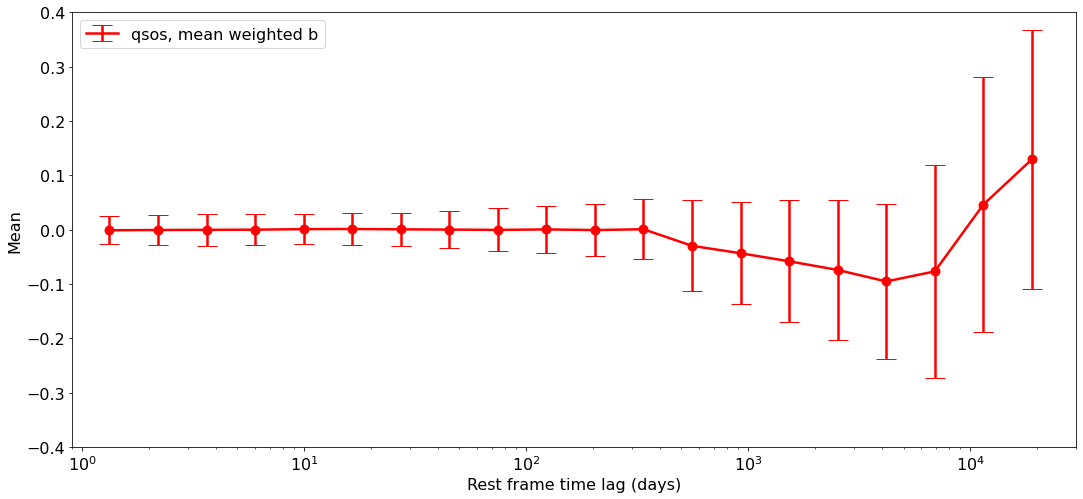

In [11]:
# mean weighted a and b are the same except in their errors. a is using 1/errors^2 and b uses var(dm)
fig, ax = dtdm_qsos.plot_stats(['mean weighted b'], figax=None, xscale='log', yscale='linear', ylim=(-0.4, 0.4), xlim=(0.9,3e4), ylabel='Mean', color='r')
ax.legend()


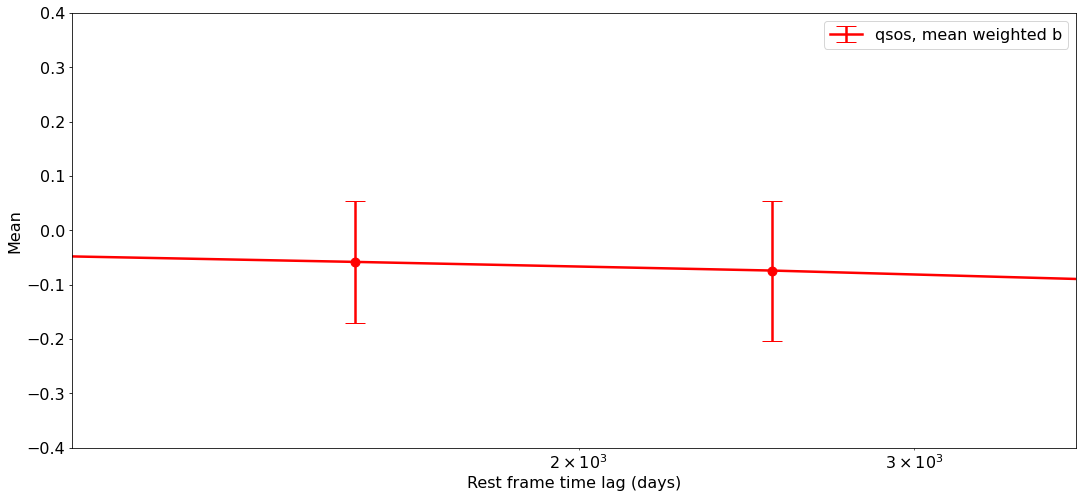

In [12]:
fig, ax = dtdm_qsos.plot_stats(['mean weighted b'], figax=None, xscale='log', yscale='linear', ylim=(-0.4, 0.4), xlim=(1084.05, 3650), ylabel='Mean', color='r')


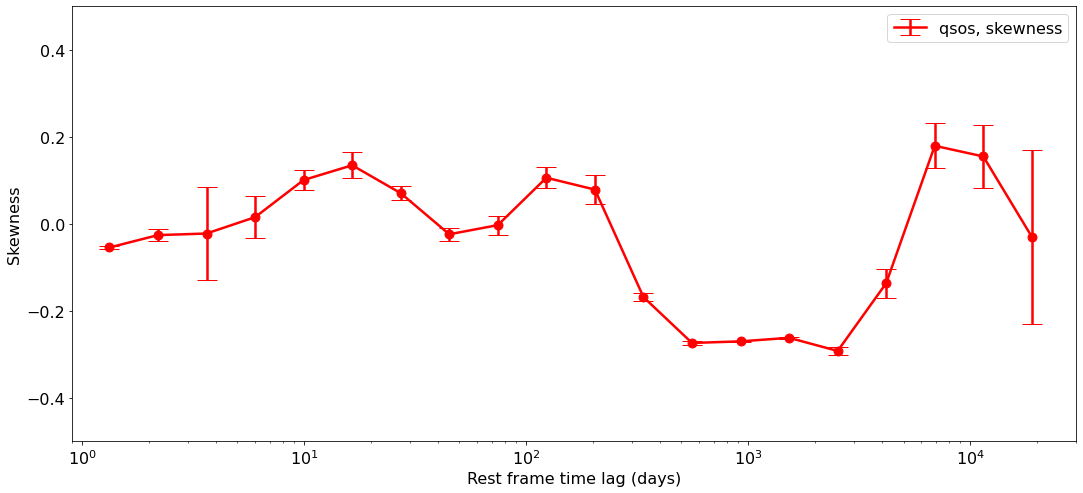

In [13]:
fig, ax = dtdm_qsos.plot_stats(['skewness'], figax=None, xscale='log', yscale='linear', ylim=(-0.5, 0.5), xlim=(0.9,3e4), ylabel='Skewness', color='r')


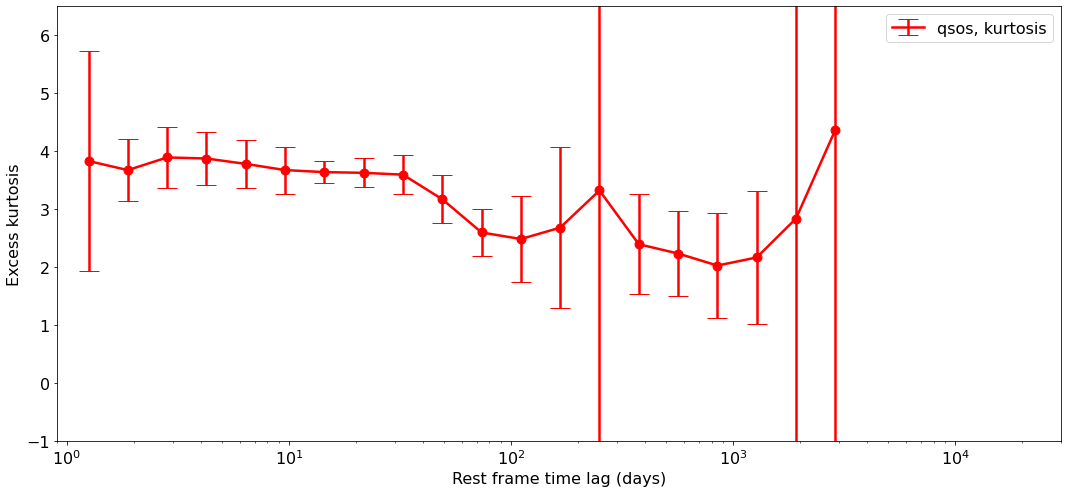

In [7]:
fig, ax = dtdm_qsos.plot_stats(['kurtosis'], figax=None, xscale='log', yscale='linear', ylim=(-1, 6.5), xlim=(0.9,3e4), ylabel='Excess kurtosis', color='r')


# Asymmetry

In [ ]:
fig, ax = dtdm_qsos.plot_stats(['SF cwf p'], figax=None, xscale='log', yscale='linear', ylim=(-0.01, 0.6), xlim=(0.9,3e4), ylabel='Structure Function (mag)', macleod=True, fit=True, color='r')
dtdm_qsos.plot_stats(['SF cwf n'], figax=(fig,ax), color='b')

# dtdm_star.plot_stats(['SF cwf p'], figax=(fig,ax), color='r')
# dtdm_star.plot_stats(['SF cwf n'], figax=(fig,ax), color='b')


# fig.savefig('plots/SF_asym.pdf', bbox_inches='tight')

In [ ]:
fig, ax = dtdm_qsos.plot_stats(['SF cwf p'], figax=None, xscale='log', yscale='linear', ylim=(-0.01, 0.6), xlim=(0.9,3e4), ylabel='Structure Function (mag)', macleod=True, fit=True, color='r')
dtdm_qsos.plot_stats(['SF cwf n'], figax=(fig,ax), xscale='log', yscale='linear', color='b', label='john')

# fig.savefig('plots/SF_asym.pdf', bbox_inches='tight')

In [ ]:
# # Saving 
# np.savetxt('Ensemble_structure_function_qsos.csv',np.vstack([dtdm_qsos.mjd_centres,dtdm_qsos.pooled_stats['SF a'].T**0.5]).T,fmt='%.8e',delimiter=',')



In [ ]:
# keys = sorted([key for key in dtdm_qsos_log.pooled_stats.keys() if key.startswith('SF')])
# n = len(keys)
# # fig, ax = plt.subplots(n, 1, figsize=(18,5*n))
# for i, key in enumerate(keys):
# #     ax[i].hist(dtdm_qsos_log.pooled_stats[key][:,1], label=key)
# #     ax[i].legend()
#     print(key,'\t\t\t',dtdm_qsos_log.pooled_stats[key][:,1].mean())

In [ ]:
# Squareroot our SF, since we save SF^2
for dtdm_survey in [dtdm_qsos]:
    for name in ['SF cwf a','SF cwf b', 'SF cwf n', 'SF cwf p']:
        dtdm_survey.pooled_stats[name][:,1] = dtdm_survey.pooled_stats[name][:,1]**2
        dtdm_survey.pooled_stats[name][np.isnan(dtdm_survey.pooled_stats[name])]=0

In [ ]:
dtdm_star.read(4)

In [ ]:
dtdm_star.plot_dm2_de2_hist(figax=None, bins=100, xlim=[-1,1])

In [ ]:
keys = ['SF cwf a']
fig, ax = dtdm_qsos.plot_stats(keys, None, xscale='log', yscale='linear', ylim=(-0.01, 0.6), xlim=(0.9,3e4), ylabel='Structure Function (mag)', macleod=True, fit=True, color='r')
fig, ax = dtdm_star.plot_stats(keys, (fig,ax), color='g')
# fig, ax = dtdm_star.plot_stats(['SF cwf c'], (fig,ax), color='r')
# fig, ax = dtdm_star2.plot_stats(['SF corrected weighted fixed'], (fig,ax), color='b')
# dtdm_star_log3.plot_stats(keys, (fig,ax))
ax.axhline(y=0, color='k', ls='--')
# fig.savefig('plots/sf_largeerrors_corrected_plate_errors.pdf', bbox_inches='tight')

In [ ]:
dtdm_star_log2 = dtdm_raw_analysis('calibStars', 'uid_s', 'r')
dtdm_star_log2.read_pooled_stats(log_or_lin='log2')
dtdm_qsos_log2 = dtdm_raw_analysis('qsos', 'uid', 'r')
dtdm_qsos_log2.read_pooled_stats(log_or_lin='log2')

In [ ]:
# We cannot fit gaussian^2 distribution to our ∆m^2 data, the tails are too big. If we have a group of qsos with similar parameters, this may be possible.

# from scipy.optimize import curve_fit
# fig, ax = plt.subplots(1,1, figsize=(18,5))
# def pdf_Y(x, sigma):
#     return (2*np.pi*x*sigma**2)**-0.5*np.exp(-0.5*x/(sigma**2))
# x = np.linspace(0.001,0.1,101)

# n, edges, _ = ax.hist(subset['dm']**2, bins=200, range=(0,0.001), density=True)
# centres = (edges[1:]+edges[:-1])/2
# sig, sigerr = curve_fit(pdf_Y, centres, n, p0=0.1)
# ax.plot(centres, pdf_Y(centres, sig))
# ax.set(yscale='log')
# print(sig)


In [ ]:
keys = ['SF corrected weighted fixed']
fig, ax = dtdm_qsos_log2.plot_stats(keys,None, xscale='log', yscale='linear', ylim=(-0.01, 0.6), xlim=(0.9,3e4), ylabel='Structure Function (mag)', macleod=True, fit=True, color='r')
fig, ax = dtdm_star_log2.plot_stats(keys, (fig,ax), color='g')
# dtdm_star_log3.plot_stats(keys, (fig,ax))
ax.axhline(y=0, color='k', ls='--')
# fig.savefig('plots/DEX_SF_lin_larger_font.pdf', bbox_inches='tight')

In [ ]:
keys = ['SF corrected weighted fixed']
fig, ax = dtdm_qsos_log2.plot_stats(keys, None, xscale='log', yscale='linear', ylim=(-0.01, 0.4), ylabel='Structure Function$^2$', macleod=True, fit=True)
fig, ax = dtdm_star_log2.plot_stats(keys, (fig,ax), )
# dtdm_star_log3.plot_stats(keys, (fig,ax))
ax.axhline(y=0)
# fig.savefig('plots/QSOS_SF_corrected_fixed_comparison_2.pdf', bbox_inches='tight')

In [ ]:
# dtdm_star_log = dtdm_raw_analysis('calibStars', 'uid_s', 'r')
# dtdm_star_log.calculate_stats_looped(50, log_or_lin='log3', save= True)

In [ ]:
# dtdm_star_log = dtdm_raw_analysis('qsos', 'uid', 'r')
# dtdm_star_log.calculate_stats_looped(13, log_or_lin='log3', save= True)

In [ ]:
dtdm_star_log = dtdm_raw_analysis('calibStars', 'uid_s', 'r')
dtdm_star_log.read_pooled_stats(log_or_lin='log')
dtdm_star_log2 = dtdm_raw_analysis('calibStars', 'uid_s', 'r')
dtdm_star_log2.read_pooled_stats(log_or_lin='log2')
dtdm_star_log3 = dtdm_raw_analysis('calibStars', 'uid_s', 'r')
dtdm_star_log3.read_pooled_stats(log_or_lin='log3')
dtdm_qsos_log = dtdm_raw_analysis('qsos', 'uid', 'r')
dtdm_qsos_log.read_pooled_stats(log_or_lin='log')
# dtdm_qsos_log2 = dtdm_raw_analysis('qsos', 'uid', 'r')
# dtdm_qsos_log2.read_pooled_stats(log_or_lin='log2')
# dtdm_star_log3 = dtdm_raw_analysis('calibStars', 'uid_s', 'r')
# dtdm_star_log3.read_pooled_stats(log_or_lin='log3')

In [ ]:
dtdm_star_log.pooled_stats.keys()

In [ ]:
dtdm_star_log.pooled_stats['n']

In [ ]:
keys = ['SF cwf a']
fig, ax = dtdm_star_log2.plot_stats(keys,None, xscale='log', yscale='linear', ylim=(-0.01, 0.6), xlim=(0.9,3e4), ylabel='Structure Function$^2$', macleod=True)
fig, ax = dtdm_star_log.plot_stats(keys, (fig,ax))
fig, ax = dtdm_qsos_log.plot_stats(keys, (fig,ax))
dtdm_star_log3.plot_stats(keys, (fig,ax))
# fig.savefig('plots/QSOS_SF_corrected_fixed_comparison_ylinear.pdf', bbox_inches='tight')

In [ ]:
keys = ['SF corrected weighted fixed']
fig, ax = dtdm_qsos_log.plot_stats(keys,None, xscale='log', yscale='log', ylim=(3e-4, 0.4), ylabel='Structure Function$^2$', macleod=True)
fig, ax = dtdm_star_log.plot_stats(keys, (fig,ax))
# dtdm_star_log3.plot_stats(keys, (fig,ax))
fig.savefig('plots/QSOS_SF_corrected_fixed_comparison_3.pdf', bbox_inches='tight')

In [ ]:
keys = ['SF corrected weighted fixed']
fig, ax = dtdm_qsos_log.plot_stats(keys,None, xscale='log', yscale='log', ylim=(3e-4, 0.4), ylabel='Structure Function$^2$', macleod=True)
fig, ax = dtdm_star_log.plot_stats(keys, (fig,ax))
# dtdm_star_log3.plot_stats(keys, (fig,ax))
# fig.savefig('plots/QSOS_SF_corrected_fixed_comparison_ylinear.pdf', bbox_inches='tight')

In [ ]:
dtdm_star_log3.pooled_stats['SF corrected weighted']

In [ ]:
dtdm_qsos_log.read_key('Lbol')

In [ ]:
dtdm_qsos_log.groups[-1].loc[20005]

In [ ]:
dtdm_qsos_log.pooled_stats['SF 2'][:,1] /= 2

In [ ]:
keys = ['SF corrected wighte', 'SF 2']
fig, ax = dtdm_qsos_log.plot_stats(keys,None, macleod=True, xscale='log', yscale='linear', ylim=(0, 1.1), ylabel='Structure Function$^2$')
dtdm_star_log.plot_stats(keys, (fig,ax))
# fig.savefig('plots/QSOS_SF_corrected_fixed_comparison.pdf', bbox_inches='tight')

In [ ]:
keys = ['SF corrected weighted', 'SF corrected weighted fixed']
fig, ax = dtdm_qsos_log.plot_stats(keys,None, xscale='log', yscale='log', ylim=(3e-2, 1e0), ylabel='Structure Function$^2$', macleod=True)
dtdm_star_log.plot_stats(keys, (fig,ax))
fig.savefig('plots/QSOS_SF_corrected_fixed_comparison_ylinear.pdf', bbox_inches='tight')

In [ ]:
keys = ['SF 1', 'SF 2', 'SF 3']
fig, ax = dtdm_qsos_log.plot_stats(keys,None, xscale='log', yscale='log', ylim=(3e-2, 1), ylabel='Structure Function$^2$')
# dtdm_star.plot_stats(keys, (fig,ax))
# fig.savefig('plots/QSOS_SF_corrected_comparison.pdf', bbox_inches='tight')

In [ ]:
keys = ['SF', 'SF corrected']
fig, ax = dtdm_qsos.plot_stats(keys,None, xscale='log', yscale='log', ylim=(3e-2, 1), ylabel='Structure Function$^2$')
# dtdm_star.plot_stats(keys, (fig,ax))
fig.savefig('plots/QSOS_SF_corrected_comparison.pdf', bbox_inches='tight')

In [ ]:
keys = ['SF corrected weighted']
fig, ax = dtdm_qsos_lin.plot_stats(keys,None, ylim=(3e-3, 1), ylabel='Structure Function$^2$', macleod=True)
dtdm_qsos_log.plot_stats(keys, (fig, ax))
dtdm_star_log.plot_stats(keys, (fig, ax))
# dtdm_star.plot_stats(keys, (fig,ax))
# fig.savefig('plots/QSOS_SF_corrected_comparison_lin.pdf', bbox_inches='tight')

In [ ]:
# Note that SF is really SF^2, and error bars are variance not std
keys = ['SF corrected weighted', 'SF corrected']
fig, ax = dtdm_qsos.plot_stats(keys,None, xscale='log', yscale='log', ylabel='Structure Function$^2$', ylim=(2e-3, 7e-1))
dtdm_star.plot_stats(keys, (fig,ax))
fig.savefig('plots/QSOS_STARS_SF_corrected_weighted_comparison.pdf', bbox_inches='tight')

In [ ]:
dtdm_star.plot_stats('all',None)

In [ ]:
keys = ['mean weighted']
fig, ax = dtdm_qsos.plot_stats(keys,None,xscale='log',ylim=(-0.23,0.45))
dtdm_star.plot_stats(keys, (fig,ax), xscale='log')
ax.axhline(y=0, lw=0.5, color='k')

In [ ]:
dtdm_star = dtdm_raw_analysis('calibStars', 'uid_s', 'r')
# dtdm_star.read(10)

In [ ]:
# a = dtdm_qsos.df
# b = dtdm_star.df

In [ ]:
dtdm_qsos.df = a
dtdm_star.df = b

In [ ]:
# dtdm_qsos.bin_dt_2d(1)
# dtdm_qsos.contour_dt()

In [ ]:
# read(12)
fig, ax = dtdm_qsos.plot_sf(None, ylim=(1e-2, 1.1e0), xlabel = 'MJD', ylabel='SF', title='Structure function for QSOs')

In [ ]:
# read(8)
fig, ax = dtdm_qsos.plot_sf(None, ylim=(1e-2, 1.1e0))

In [ ]:
# read(4)
dtdm_qsos.plot_sf(None, ylim=(1e-2, 1.1e0))

In [ ]:
dtdm_qsos.plot_sf(None, ylim=(1e-2, 1.1e0))

In [ ]:
fig, ax = dtdm_star.plot_sf(None, ylim=(0.5e-2, 1.1e0))
fig.savefig('plots/STARS_SF_corrected.pdf', bbox_inches='tight')

In [ ]:
dtdm_qsos.calculate_sf()
print('_'*20)
dtdm_star.calculate_sf()

In [ ]:
fig, ax = plot_sf(dtdm_star,None)
plot_sf(dtdm_qsos,(fig,ax))
ax.set(xlabel = 'MJD', ylabel='SF', title='Structure function')

In [ ]:
fig.savefig('plots/QSOS_STAR_4_SF.pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(5,1, figsize=(18,25))
# dtdm_qsos.plot_dm2_de2_hist((fig,ax), bins=201, xlim=[-0.12, 0.2])
dtdm_star_log.plot_dm2_de2_hist((fig,ax), bins=201, xlim=[-0.12, 0.2])
# ax.legend()

In [ ]:
dtdm.contour()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(df['dm'], bins=200, range=(-1,1));

In [ ]:
a,b,c = np.histogram2d(df['de'],df['dm'],range=((0,0.4),(-0.5,0.5)), bins=(200,200))

In [ ]:
def correlate_mag_magerr_hist_sns(df, band, vmin, vmax, save=False):
    # contour plot of ∆e and ∆m
    from matplotlib.colors import LogNorm
    import seaborn as sns
    xname = 'de'
    yname = 'dm'
    data = df
    bounds={xname:(0,0.4), yname:(-1,1)}
    g = sns.JointGrid(x=xname, y=yname, data=data, xlim=bounds[xname], ylim=bounds[yname], height=9,)
    g = g.plot_joint(plt.hexbin, norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Blues')
    g.ax_marg_x.hist(data[xname], bins=200)
    g.ax_marg_y.hist(data[yname], bins=200, orientation='horizontal', density = True)
#     g.ax_marg_y.hist(data[yname], bins=200, orientation='horizontal', cumulative=True, alpha=0.2, color='k')#, yticks=[1e-3, 1e-1, 1])
    # Could show 95, 99, 99.9% intervals on magerr histplot? Will need to do np.stats.quantile and ax.axvline
    if save:
        g.savefig('{}/plots/mag_magerr_{}_{}.pdf'.format(self.obj, self.name, band))
        
    plt.scatter(de_centres,mean+std, color='k')
    plt.plot(de_centres,mean+std, lw=0.5, color='k')

    plt.scatter(de_centres,mean-std, color='k')
    plt.plot(de_centres,mean-std, lw=0.5, color='k')
    
    plt.scatter(de_centres, mean, color='r')
    plt.plot(de_centres, mean, lw=0.5, color='r')

correlate_mag_magerr_hist_sns(dtdm.df, 'r', 1e1, 1e5)

In [ ]:
n=1000
a = np.array([np.arange(0,n),np.random.normal(0,1, size=n)]).T
uniq = np.triu_indices(n,1)

In [ ]:
dtdm = a - a[:,np.newaxis,:]

In [ ]:
dtdm.shape

In [ ]:
dtdm[uniq].shape